In [1]:
import pandas as pd
import os
import json
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/mstudio/repository/research/huggingface-models/poster'

##### NLP

In [3]:
cwd=os.getcwd()
nlp_task={}
parent_folder='../../../data/huggingface/model/nlp'
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path): #check only folder
        file_all={}
        for file in os.listdir(folder_path):
            if file.endswith('.json'):
                file_metadata={}
                with open(os.path.join(folder_path, file), 'r') as json_file:
                    data = json.load(json_file)
                    file_metadata['created_at']=data['created_at']
                    file_metadata['id']=data['id']
                    if data['cardData'] is not None: #check if cardData is not empty
                        if 'base_model' in data['cardData']:
                            file_metadata['base_model']=data['cardData']['base_model']
                        if 'datasets' in data['cardData']:
                            file_metadata['datasets']=data['cardData']['datasets']
                file_all[file.replace('.json', '')]=file_metadata
        nlp_task[folder]=file_all
#1m16s

In [4]:
nlp_task.keys() 

dict_keys(['question-answering', 'text-generation', 'feature-extraction', 'table-question-answering', 'sentence-similarity', 'translation', 'summarization', 'zero-shot-classification', 'text-classification', 'token-classification', 'text2text-generation', 'fill-mask'])

In [5]:
nlp_task['table-question-answering']['64a263bfb5b55f4657d6f432']

{'created_at': '2023-07-03T05:59:27+00:00',
 'id': 'Ezell/testModel',
 'base_model': None,
 'datasets': ['GAIR/lima']}

In [6]:
name_id={}
for key in nlp_task.keys():
    for sub_key in nlp_task[key].keys():
        name_id[sub_key]=nlp_task[key][sub_key]['id']

In [7]:
pd.DataFrame.from_dict(name_id, orient='index').reset_index().rename(columns={'index': 'model_id', 0: 'model_name'}).to_csv('../nlp_model_id.csv', index=False)

In [8]:
type(nlp_task['table-question-answering']['64a263bfb5b55f4657d6f432']['datasets'])

list

In [9]:
for task in nlp_task.keys():
    for model in nlp_task[task].keys():
        if ('base_model' in nlp_task[task][model].keys()) and (nlp_task[task][model]['base_model'] is not None) and (type(nlp_task[task][model]['base_model'])==str):
        # all string values are now in the list
            nlp_task[task][model]['base_model']=[nlp_task[task][model]['base_model']]
        if ('datasets' in nlp_task[task][model].keys()) and (nlp_task[task][model]['datasets'] is not None) and (type(nlp_task[task][model]['datasets'])==str):
        # all string values are now in the list
            nlp_task[task][model]['datasets']=[nlp_task[task][model]['datasets']]
        if ('created_at' in nlp_task[task][model].keys()) and (nlp_task[task][model]['created_at'] is not None) and (type(nlp_task[task][model]['created_at'])==str):
        # all string values are now in datetime
            nlp_task[task][model]['created_at']=datetime.strptime(nlp_task[task][model]['created_at'], '%Y-%m-%dT%H:%M:%S%z')            

In [10]:
nlp_task['table-question-answering']['64a263bfb5b55f4657d6f432']

{'created_at': datetime.datetime(2023, 7, 3, 5, 59, 27, tzinfo=datetime.timezone.utc),
 'id': 'Ezell/testModel',
 'base_model': None,
 'datasets': ['GAIR/lima']}

#### NLP RQ 3: What is the degree of concentration of NLP models?

In [11]:
task_list=[]
model_list=[]
base_model_list=[]
model_count_list=[]
created_at_list=[]
for task in nlp_task.keys():
    for model in nlp_task[task].keys():
        if ('base_model' in nlp_task[task][model].keys()) and (nlp_task[task][model]['base_model'] is not None) and (type(nlp_task[task][model]['base_model']) == list):
            #Sometimes, the list can be empty
            model_count=0
            if len(nlp_task[task][model]['base_model'])>0: #Check the number of elements in the list
                for base_model in nlp_task[task][model]['base_model']:
                    model_count+=1
                task_list.append(task)
                model_list.append(model)
                base_model_list.append(nlp_task[task][model]['base_model'])
                model_count_list.append(model_count)
                created_at_list.append(nlp_task[task][model]['created_at'])

In [12]:
print(len(task_list), len(model_list), len(base_model_list), len(model_count_list), len(created_at_list))

112237 112237 112237 112237 112237


In [13]:
nlp_model_df=pd.DataFrame({'task':task_list, 'model':model_list, 'base_model':base_model_list, 'model_count':model_count_list, 'created_at':created_at_list})

In [14]:
nlp_model_df.sort_values(by='model_count', ascending=False)

,task,model,base_model,model_count,created_at
20560,text-generation,678afb3e14ab8d115b77e17e,"[surya-narayanan/abstract_algebra, surya-naray...",98,2025-01-18 00:52:14+00:00
31442,text-generation,66513721edd332b94463cdb3,"[openlynn/Llama-3-Soliloquy-8B-v2, Undi95/Llam...",53,2024-05-25 00:56:01+00:00
11545,text-generation,67a126f5f39a622350700a56,"[MrRobotoAI/Loki-v1.1-8b-EROTICA, kik41/lora-l...",52,2025-02-03 20:28:37+00:00
10534,text-generation,67a48a8bbd5de09766dce2b2,"[MrRobotoAI/Llama-3-8B-Uncensored-test2, Azaze...",48,2025-02-06 10:10:19+00:00
36345,text-generation,6655ecd5dbde6ec0582106d1,"[NousResearch/Meta-Llama-3-8B, NousResearch/Me...",48,2024-05-28 14:40:21+00:00
...,...,...,...,...,...
40343,text-generation,652a5e7ac6857682d3cbc09d,[meta-llama/Llama-2-7b-chat-hf],1,2023-10-14 09:25:14+00:00
40340,text-generation,679fc4dc89be13de6acd1aa8,[EleutherAI/pythia-14m],1,2025-02-02 19:17:48+00:00
40339,text-generation,6724bc8866d3bf0b3adda6b2,[unsloth/SmolLM2-360M],1,2024-11-01 11:33:28+00:00
40338,text-generation,65b36059e312613c6055719c,[MaziyarPanahi/Ferret_7B-Mistral-7B-Instruct-v...,1,2024-01-26 07:33:45+00:00


<Figure size 1200x600 with 0 Axes>

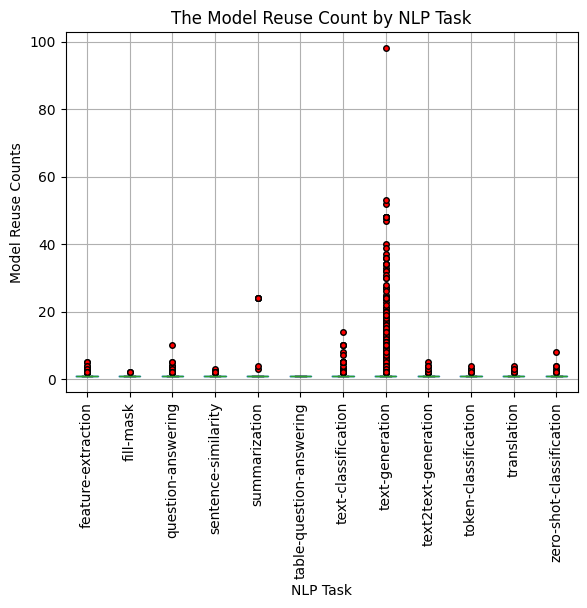

In [15]:
plt.figure(figsize=(12, 6))
flierprops = dict(marker='o', markersize=4, linestyle='none', color='red', markerfacecolor='red')  # Adjust marker size and fill color
nlp_model_df.boxplot(column='model_count', by='task', grid=True, flierprops=flierprops)
plt.xticks(rotation=90)
plt.title('The Model Reuse Count by NLP Task')
plt.suptitle('')  # Remove the default title
plt.xlabel('NLP Task')
plt.ylabel('Model Reuse Counts')
plt.savefig('rq3-model-nlp.png', bbox_inches='tight')
plt.show()

In [16]:
nlp_model_df['model_count'].groupby(nlp_model_df['task']).mean().sort_values(ascending=False)

task
text-generation             1.334787
summarization               1.176991
zero-shot-classification    1.141791
feature-extraction          1.026835
question-answering          1.016063
translation                 1.014127
sentence-similarity         1.005975
text-classification         1.005818
text2text-generation        1.003129
token-classification        1.001692
fill-mask                   1.001314
table-question-answering    1.000000
Name: model_count, dtype: float64

In [17]:
nlp_model_df['model_count'].groupby(nlp_model_df['task']).std().sort_values(ascending=False)

task
summarization               1.973518
text-generation             1.501223
zero-shot-classification    0.737329
question-answering          0.225536
feature-extraction          0.208331
text-classification         0.178407
translation                 0.161440
text2text-generation        0.082629
sentence-similarity         0.081782
token-classification        0.055671
fill-mask                   0.036234
table-question-answering    0.000000
Name: model_count, dtype: float64

#### NLP RQ 1: What is the degree of diversity of datasets in training NLP models?

In [18]:
task_list=[]
model_list=[]
dataset_list=[]
dataset_count_list=[]
created_at_list=[]
for task in nlp_task.keys():
    for model in nlp_task[task].keys():
        if ('datasets' in nlp_task[task][model].keys()) and (nlp_task[task][model]['datasets'] is not None) and (type(nlp_task[task][model]['datasets']) == list):
            #Sometimes, the list can be empty
            dataset_count=0
            if len(nlp_task[task][model]['datasets'])>0: #Check the number of elements in the list
                for dataset in nlp_task[task][model]['datasets']:
                    dataset_count+=1
                task_list.append(task)
                model_list.append(model)
                dataset_list.append(nlp_task[task][model]['datasets'])
                dataset_count_list.append(dataset_count)
                created_at_list.append(nlp_task[task][model]['created_at'])

In [19]:
print(len(task_list), len(model_list), len(dataset_list), len(dataset_count_list), len(created_at_list))

59834 59834 59834 59834 59834


In [20]:
nlp_dataset_df=pd.DataFrame({'task':task_list, 'model':model_list, 'dataset':dataset_list, 'dataset_count':dataset_count_list, 'created_at':created_at_list})

In [21]:
len(nlp_task['text-classification']['65ba36c403bb6d3836afbee3']['datasets'])

289

In [22]:
nlp_dataset_df.sort_values(by='dataset_count', ascending=False)

,task,model,dataset,dataset_count,created_at
36726,text-classification,65ba36c403bb6d3836afbee3,"[nyu-mll/glue, aps/super_glue, facebook/anli, ...",289,2024-01-31 12:02:12+00:00
32763,zero-shot-classification,65ba36c403bb6d3836afbee3,"[nyu-mll/glue, aps/super_glue, facebook/anli, ...",289,2024-01-31 12:02:12+00:00
32773,zero-shot-classification,667ec118ba80b56c0f3735de,"[nyu-mll/glue, aps/super_glue, facebook/anli, ...",288,2024-06-28 13:56:40+00:00
41731,text-classification,6704614606af66752cbcf0ab,"[nyu-mll/glue, aps/super_glue, facebook/anli, ...",288,2024-10-07 22:31:34+00:00
37228,text-classification,667ec118ba80b56c0f3735de,"[nyu-mll/glue, aps/super_glue, facebook/anli, ...",288,2024-06-28 13:56:40+00:00
...,...,...,...,...,...
23324,text-generation,621ffdc136468d709f17bc9c,[huggingartists/loud-luxury],1,2022-03-02 23:29:05+00:00
23328,text-generation,63eb7df40373fa4984ea776b,[imdb],1,2023-02-14 12:26:28+00:00
23330,text-generation,65093495f6a2bf0be7bc0325,[starmpcc/Asclepius-Synthetic-Clinical-Notes],1,2023-09-19 05:41:41+00:00
23331,text-generation,6715b8a73edd22e4483e1382,[nvidia/HelpSteer2],1,2024-10-21 02:12:55+00:00


<Figure size 1200x600 with 0 Axes>

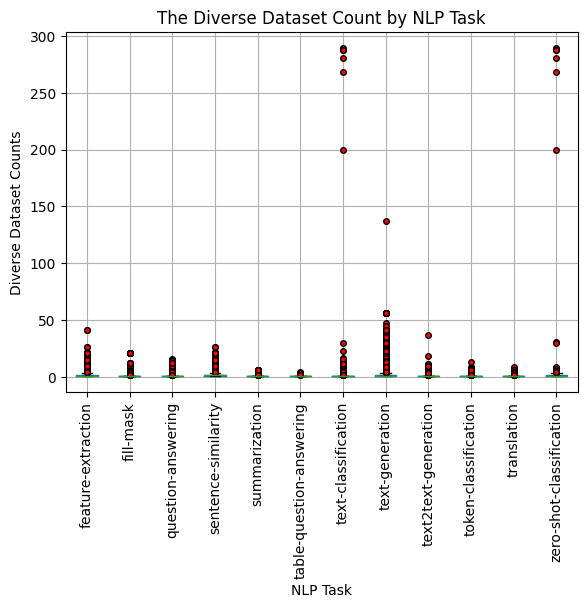

In [23]:
plt.figure(figsize=(12, 6))
flierprops = dict(marker='o', markersize=4, linestyle='none', color='red', markerfacecolor='red') 
nlp_dataset_df.boxplot(column='dataset_count', by='task', grid=True, flierprops=flierprops)
plt.xticks(rotation=90)
plt.title('The Diverse Dataset Count by NLP Task')
plt.suptitle('')  # Remove the default title
plt.xlabel('NLP Task')
plt.ylabel('Diverse Dataset Counts')
plt.savefig('rq1-diverse-nlp.png', bbox_inches='tight')
plt.show()

In [24]:
nlp_dataset_df['dataset_count'].groupby(nlp_dataset_df['task']).mean()

task
feature-extraction          2.578267
fill-mask                   1.412619
question-answering          1.200540
sentence-similarity         3.364784
summarization               1.104818
table-question-answering    1.130952
text-classification         1.215466
text-generation             2.371421
text2text-generation        1.242560
token-classification        1.061259
translation                 1.159016
zero-shot-classification    8.757447
Name: dataset_count, dtype: float64

In [25]:
nlp_dataset_df['dataset_count'].groupby(nlp_dataset_df['task']).std()


task
feature-extraction           4.396464
fill-mask                    1.638405
question-answering           1.117778
sentence-similarity          5.345747
summarization                0.497883
table-question-answering     0.509660
text-classification          6.009211
text-generation              4.277364
text2text-generation         1.059844
token-classification         0.456536
translation                  0.573657
zero-shot-classification    42.621028
Name: dataset_count, dtype: float64

#### NLP RQ 2: What is the degree of concentration of NLP datasets and CV datasets?

In [26]:
cwd=os.getcwd()
nlp_dataset={}
dataset_folder='../../../data/huggingface/dataset/nlp'
for folder in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder)
    if os.path.isdir(folder_path): #check only folder
        file_all={}
        for file in os.listdir(folder_path):
            if file.endswith('.json'):
                file_metadata={}
                with open(os.path.join(folder_path, file), 'r') as json_file:
                    data = json.load(json_file)
                    file_metadata['created_at']=data['created_at']
                    file_metadata['id']=data['id']
                        
                    # if data['cardData'] is not None: #check if cardData is not empty
                    #     if 'base_model' in data['cardData']:
                    #         file_metadata['base_model']=data['cardData']['base_model']
                    #     if 'datasets' in data['cardData']:
                    #         file_metadata['datasets']=data['cardData']['datasets']
                file_all[file.replace('.json', '')]=file_metadata
        nlp_dataset[folder]=file_all
#2s

In [27]:
name_id={}
for key in nlp_dataset.keys():
    for sub_key in nlp_dataset[key].keys():
        name_id[sub_key]=nlp_dataset[key][sub_key]['id']

In [28]:
task_list=[] 
dataset_list=[]
used_models_list=[]
for key in tqdm(nlp_dataset.keys()):
    datasets = {}
    for file in tqdm(nlp_dataset[key].keys()):
        data_id = nlp_dataset[key][file]['id']
        used_models = []
        for file_model in nlp_task[key].keys():
            if ('datasets' in nlp_task[key][file_model] and nlp_task[key][file_model]['datasets'] is not None and data_id in nlp_task[key][file_model]['datasets']):
                # used_models.append(nlp_model[key][file_model]['id'])
                used_models.append(file_model)
        task_list.append(key)
        dataset_list.append(file)
        used_models_list.append(used_models)

#7m 3s

100%|██████████| 12/12 [08:03<00:00, 40.26s/it]


In [29]:
print(len(task_list), len(dataset_list), len(used_models_list))
df = pd.DataFrame({'task': task_list, 'dataset': dataset_list, 'used_models': used_models_list})

28432 28432 28432


In [30]:
df.iloc[15]['used_models']

['66f820a956a2aa7fe92c4e1f',
 '66f2a2a76644255c2731de08',
 '66fab8181208c881d9562941']

In [31]:
df['len']=df['used_models'].apply(lambda x: len(x))

In [32]:
df.sort_values(by='len', ascending=False, inplace=True)

<Figure size 1200x600 with 0 Axes>

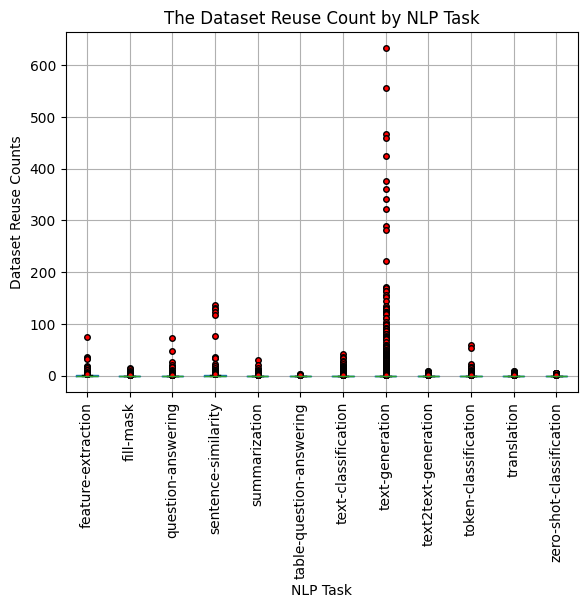

In [33]:
plt.figure(figsize=(12, 6))
flierprops = dict(marker='o', markersize=4, linestyle='none', color='red', markerfacecolor='red')  # Adjust marker size
df.boxplot(column='len', by='task', grid=True, flierprops=flierprops)
plt.xticks(rotation=90)
plt.title('The Dataset Reuse Count by NLP Task')
plt.suptitle('')  # Remove the default title
plt.xlabel('NLP Task')
plt.ylabel('Dataset Reuse Counts')
plt.savefig('rq2-dataset-nlp.png', bbox_inches='tight')
plt.show()

In [34]:
df['len'].groupby(df['task']).mean().sort_values(ascending=False)

task
text-generation             1.887399
sentence-similarity         1.833107
feature-extraction          0.559159
token-classification        0.432203
text-classification         0.314556
fill-mask                   0.237154
text2text-generation        0.171946
summarization               0.162943
question-answering          0.146559
zero-shot-classification    0.124434
translation                 0.117192
table-question-answering    0.027422
Name: len, dtype: float64

In [35]:
df['len'].groupby(df['task']).std().sort_values(ascending=False)

task
text-generation             18.167127
sentence-similarity         11.099138
feature-extraction           3.094032
token-classification         2.614649
text-classification          1.620284
question-answering           1.543709
fill-mask                    1.206863
summarization                1.154452
zero-shot-classification     0.799881
text2text-generation         0.769292
translation                  0.634183
table-question-answering     0.251693
Name: len, dtype: float64

##### CV

In [36]:
cwd=os.getcwd()
cv_task={}
parent_folder='../../../data/huggingface/model/cv'
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path): #check only folder
        file_all={}
        for file in os.listdir(folder_path):
            if file.endswith('.json'):
                file_metadata={}
                with open(os.path.join(folder_path, file), 'r') as json_file:
                    data = json.load(json_file)
                    file_metadata['created_at']=data['created_at']
                    file_metadata['id']=data['id']
                    if data['cardData'] is not None: #check if cardData is not empty
                        if 'base_model' in data['cardData']:
                            file_metadata['base_model']=data['cardData']['base_model']
                        if 'datasets' in data['cardData']:
                            file_metadata['datasets']=data['cardData']['datasets']
                file_all[file.replace('.json', '')]=file_metadata
        cv_task[folder]=file_all
#15s

In [37]:
name_id={}
for key in cv_task.keys():
    for sub_key in cv_task[key].keys():
        name_id[sub_key]=cv_task[key][sub_key]['id']

In [38]:
pd.DataFrame.from_dict(name_id, orient='index').reset_index().rename(columns={'index': 'model_id', 0: 'model_name'}).to_csv('cv_model_id.csv', index=False)

In [39]:
cv_task.keys()

dict_keys(['mask-generation', 'text-to-video', 'image-to-video', 'zero-shot-image-classification', 'unconditional-image-generation', 'image-to-text', 'image-to-image', 'image-classification', 'text-to-image', 'image-feature-extraction', 'text-to-3d', 'depth-estimation', 'zero-shot-object-detection', 'keypoint-detection', 'object-detection', 'video-classification', 'image-segmentation', 'image-to-3d'])

In [40]:
for task in cv_task.keys():
    for model in cv_task[task].keys():
        if ('base_model' in cv_task[task][model].keys()) and (cv_task[task][model]['base_model'] is not None) and (type(cv_task[task][model]['base_model'])==str):
        # all string values are now in the list
            cv_task[task][model]['base_model']=[cv_task[task][model]['base_model']]
        if ('datasets' in cv_task[task][model].keys()) and (cv_task[task][model]['datasets'] is not None) and (type(cv_task[task][model]['datasets'])==str):
        # all string values are now in the list
            cv_task[task][model]['datasets']=[cv_task[task][model]['datasets']]
        

##### CV RQ 3: What is the degree of concentration of CV models?

In [41]:
task_list=[]
model_list=[]
base_model_list=[]
model_count_list=[]
created_at_list=[]
for task in cv_task.keys():
    for model in cv_task[task].keys():
        if ('base_model' in cv_task[task][model].keys()) and (cv_task[task][model]['base_model'] is not None) and (type(cv_task[task][model]['base_model']) == list):
            #Sometimes, the list can be empty
            model_count=0
            if len(cv_task[task][model]['base_model'])>0: #Check the number of elements in the list
                for base_model in cv_task[task][model]['base_model']:
                    model_count+=1
                task_list.append(task)
                model_list.append(model)
                base_model_list.append(cv_task[task][model]['base_model'])
                model_count_list.append(model_count)
                created_at_list.append(cv_task[task][model]['created_at'])

In [42]:
print(len(task_list), len(model_list), len(model_list), len(model_count_list), len(created_at_list))

44675 44675 44675 44675 44675


In [43]:
cv_model_df=pd.DataFrame({'task':task_list, 'model':model_list, 'base_model':base_model_list, 'model_count':model_count_list, 'created_at':created_at_list})

In [44]:
cv_model_df.sort_values(by='model_count', ascending=False)

,task,model,base_model,model_count,created_at
4376,image-classification,678d3e2970768ae96e6193a6,"[timm/convnext_nano.r384_ad_in12k, timm/convne...",100,2025-01-19T18:02:17+00:00
21011,text-to-image,673e350b74d6cdda59d0070f,"[Laxhar/noobai-XL-Vpred-0.6, Laxhar/noobai-XL-...",10,2024-11-20T19:14:19+00:00
44669,image-to-3d,67541e876f47d9ce16b7ba91,"[Qwen/Qwen2.5-Coder-32B-Instruct, stabilityai/...",10,2024-12-07T10:08:07+00:00
309,image-to-text,66e922c5ff3134c96fc6c108,"[LeroyDyer/SpydazWeb_AI_CyberTron_Ultra_7b, Le...",10,2024-09-17T06:33:41+00:00
280,unconditional-image-generation,67789ac56335bde33b81d0bf,"[meta-llama/Llama-3.3-70B-Instruct, deepseek-a...",10,2025-01-04T02:19:49+00:00
...,...,...,...,...,...
14934,text-to-image,66cb50c63fa97c9db6712654,[black-forest-labs/FLUX.1-dev],1,2024-08-25T15:41:58+00:00
14935,text-to-image,673dde23f7d52717876616f8,[black-forest-labs/FLUX.1-dev],1,2024-11-20T13:03:31+00:00
14936,text-to-image,66f706d044fba161d5ea18f8,[black-forest-labs/FLUX.1-dev],1,2024-09-27T19:26:08+00:00
14937,text-to-image,6767b80187f8465c8cc20295,[black-forest-labs/FLUX.1-dev],1,2024-12-22T06:56:01+00:00


<Figure size 1200x600 with 0 Axes>

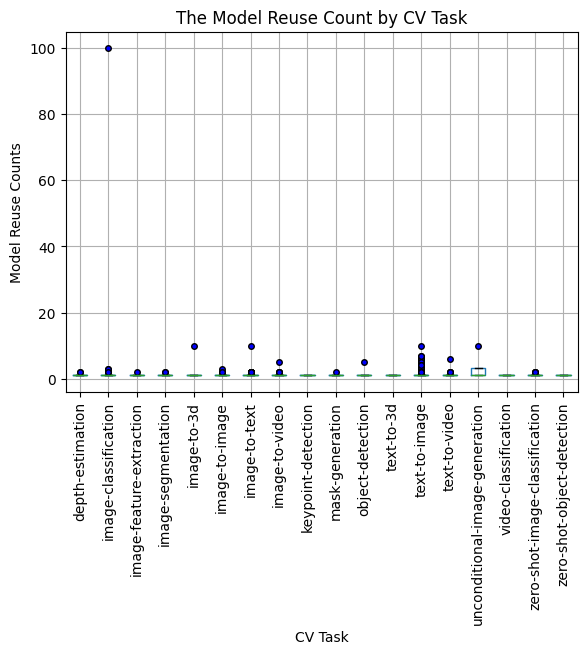

In [45]:
plt.figure(figsize=(12, 6))
flierprops = dict(marker='o', markersize=4, linestyle='none', color='blue', markerfacecolor='blue')  # Adjust marker size and fill color
cv_model_df.boxplot(column='model_count', by='task', grid=True, flierprops=flierprops)
plt.xticks(rotation=90)
plt.title('The Model Reuse Count by CV Task')
plt.suptitle('')  # Remove the default title
plt.xlabel('CV Task')
plt.ylabel('Model Reuse Counts')
plt.savefig('rq3-model-CV.png', bbox_inches='tight')
plt.show()

In [46]:
cv_model_df['model_count'].groupby(cv_model_df['task']).mean().sort_values(ascending=False)

task
unconditional-image-generation    3.250000
image-to-3d                       2.000000
image-to-video                    1.363636
image-to-text                     1.154321
mask-generation                   1.071429
text-to-video                     1.060811
depth-estimation                  1.055556
zero-shot-image-classification    1.042553
image-to-image                    1.030000
image-feature-extraction          1.018868
image-classification              1.018412
text-to-image                     1.010624
object-detection                  1.004896
image-segmentation                1.004630
keypoint-detection                1.000000
text-to-3d                        1.000000
video-classification              1.000000
zero-shot-object-detection        1.000000
Name: model_count, dtype: float64

In [47]:
cv_model_df['model_count'].groupby(cv_model_df['task']).std().sort_values(ascending=False)

task
unconditional-image-generation    4.500000
image-to-3d                       3.000000
image-classification              1.305495
image-to-video                    0.902138
image-to-text                     0.760606
text-to-video                     0.439950
mask-generation                   0.267261
depth-estimation                  0.232311
zero-shot-image-classification    0.202930
image-to-image                    0.198233
text-to-image                     0.156031
object-detection                  0.139942
image-feature-extraction          0.137361
image-segmentation                0.067962
keypoint-detection                0.000000
text-to-3d                        0.000000
video-classification              0.000000
zero-shot-object-detection        0.000000
Name: model_count, dtype: float64

##### CV RQ 1: What is the degree of diversity of datasets in training CV models?

In [48]:
task_list=[]
model_list=[]
dataset_list=[]
dataset_count_list=[]
created_at_list=[]
for task in cv_task.keys():
    for model in cv_task[task].keys():
        if ('datasets' in cv_task[task][model].keys()) and (cv_task[task][model]['datasets'] is not None) and (type(cv_task[task][model]['datasets']) == list):
            #Sometimes, the list can be empty
            dataset_count=0
            if len(cv_task[task][model]['datasets'])>0: #Check the number of elements in the list
                for dataset in cv_task[task][model]['datasets']:
                    dataset_count+=1
                task_list.append(task)
                model_list.append(model)
                dataset_list.append(cv_task[task][model]['datasets'])
                dataset_count_list.append(dataset_count)
                created_at_list.append(cv_task[task][model]['created_at'])

In [49]:
print(len(task_list), len(model_list), len(dataset_list), len(dataset_count_list), len(created_at_list))

12839 12839 12839 12839 12839


In [50]:
cv_dataset_df=pd.DataFrame({'task':task_list, 'model':model_list, 'dataset':dataset_list, 'dataset_count':dataset_count_list, 'created_at':created_at_list})

<Figure size 1200x600 with 0 Axes>

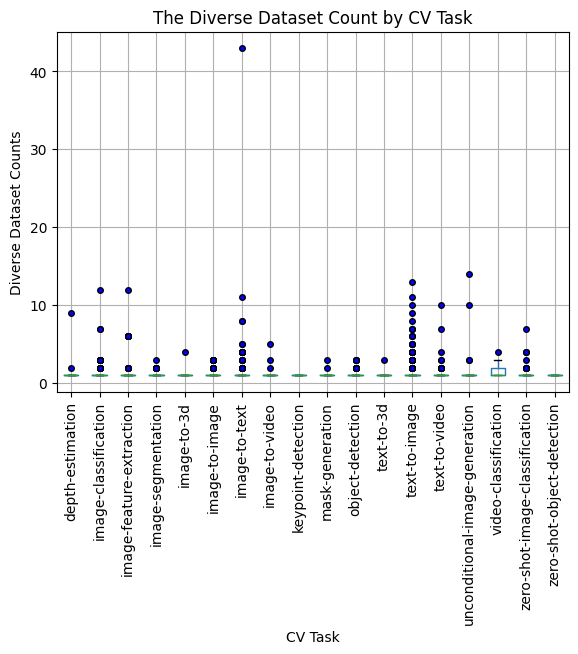

In [51]:
plt.figure(figsize=(12, 6))
flierprops = dict(marker='o', markersize=4, linestyle='none', color='blue', markerfacecolor='blue')  # Adjust marker size and fill color
cv_dataset_df.boxplot(column='dataset_count', by='task', grid=True, flierprops=flierprops)
plt.xticks(rotation=90)
plt.title('The Diverse Dataset Count by CV Task')
plt.suptitle('')  # Remove the default title
plt.xlabel('CV Task')
plt.ylabel('Diverse Dataset Counts')
plt.savefig('rq1-diverse-cv.png', bbox_inches='tight')
plt.show()

In [52]:
cv_dataset_df.sort_values(by='dataset_count', ascending=False)

,task,model,dataset,dataset_count,created_at
277,image-to-text,66e922c5ff3134c96fc6c108,"[gretelai/synthetic_text_to_sql, HuggingFaceTB...",43,2024-09-17T06:33:41+00:00
211,unconditional-image-generation,651540420a2f6b1b30509600,"[Falah/image_generation_prompts_SDXL, pszemraj...",14,2023-09-28T08:58:42+00:00
8734,text-to-image,66a7f8bb851564e02b88b909,"[cc0, public-domain, artbench-10, flickr, wiki...",13,2024-07-29T20:16:59+00:00
11865,image-feature-extraction,670ff448ce853cebbe719452,"[laion-en, laion-zh, coyo, grit, coco, textcap...",12,2024-10-16T17:13:44+00:00
2340,image-classification,67b03508248b716880d42052,"[laion-en, laion-zh, coyo, grit, coco, textcap...",12,2025-02-15T06:32:40+00:00
...,...,...,...,...,...
4454,image-classification,6417c4c57430a34fe0d19077,[food101],1,2023-03-20T02:28:21+00:00
4455,image-classification,64e65de663a807297faff7d2,[imagenet-1k],1,2023-08-23T19:28:38+00:00
4456,image-classification,66f19dc55fe69af1047ac904,[imagefolder],1,2024-09-23T16:56:37+00:00
4457,image-classification,65874e95085a5bce611309bb,[imagefolder],1,2023-12-23T21:18:13+00:00


In [53]:
cv_dataset_df['dataset_count'].groupby(cv_dataset_df['task']).mean()

task
depth-estimation                  1.750000
image-classification              1.058758
image-feature-extraction          1.760000
image-segmentation                1.041322
image-to-3d                       1.130435
image-to-image                    1.293103
image-to-text                     1.642276
image-to-video                    1.368421
keypoint-detection                1.000000
mask-generation                   1.333333
object-detection                  1.050314
text-to-3d                        1.222222
text-to-image                     1.120178
text-to-video                     1.580000
unconditional-image-generation    1.388060
video-classification              1.666667
zero-shot-image-classification    1.255556
zero-shot-object-detection        1.000000
Name: dataset_count, dtype: float64

In [54]:
cv_dataset_df['dataset_count'].groupby(cv_dataset_df['task']).std()

task
depth-estimation                  2.301185
image-classification              0.297416
image-feature-extraction          1.957936
image-segmentation                0.219267
image-to-3d                       0.625543
image-to-image                    0.604580
image-to-text                     2.911287
image-to-video                    1.011628
keypoint-detection                0.000000
mask-generation                   0.707107
object-detection                  0.252203
text-to-3d                        0.666667
text-to-image                     0.537395
text-to-video                     1.591944
unconditional-image-generation    1.938097
video-classification              0.975900
zero-shot-image-classification    0.868437
zero-shot-object-detection             NaN
Name: dataset_count, dtype: float64

In [55]:
cv_dataset_df[cv_dataset_df['task']=='zero-shot-object-detection']

,task,model,dataset,dataset_count,created_at
11919,zero-shot-object-detection,6742dafa66d253d16ef9386e,[jtatman/yolo5_russianlicenseplates_detect],1,2024-11-24T07:51:22+00:00


##### CV RQ 2: What is the degree of concentration of CV datasets?

In [56]:
cwd=os.getcwd()
cv_dataset={}
dataset_folder='../../../data/huggingface/dataset/cv'
for folder in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder)
    if os.path.isdir(folder_path): #check only folder
        file_all={}
        for file in os.listdir(folder_path):
            if file.endswith('.json'):
                file_metadata={}
                with open(os.path.join(folder_path, file), 'r') as json_file:
                    data = json.load(json_file)
                    file_metadata['created_at']=data['created_at']
                    file_metadata['id']=data['id']
                        
                    # if data['cardData'] is not None: #check if cardData is not empty
                    #     if 'base_model' in data['cardData']:
                    #         file_metadata['base_model']=data['cardData']['base_model']
                    #     if 'datasets' in data['cardData']:
                    #         file_metadata['datasets']=data['cardData']['datasets']
                file_all[file.replace('.json', '')]=file_metadata
        cv_dataset[folder]=file_all
#2s

In [57]:
name_id={}
for key in cv_dataset.keys():
    for sub_key in cv_dataset[key].keys():
        name_id[sub_key]=cv_dataset[key][sub_key]['id']

In [58]:
task_list=[] 
dataset_list=[]
used_models_list=[]
for key in tqdm(cv_dataset.keys()):
    datasets = {}
    for file in tqdm(cv_dataset[key].keys()):
        data_id = cv_dataset[key][file]['id']
        used_models = []
        for file_model in cv_task[key].keys():
            if ('datasets' in cv_task[key][file_model] and cv_task[key][file_model]['datasets'] is not None and data_id in cv_task[key][file_model]['datasets']):
                # used_models.append(nlp_model[key][file_model]['id'])
                used_models.append(file_model)
        task_list.append(key)
        dataset_list.append(file)
        used_models_list.append(used_models)

#1m 11s

100%|██████████| 18/18 [01:06<00:00,  3.70s/it]


In [59]:
print(len(task_list), len(dataset_list), len(used_models_list))
df = pd.DataFrame({'task': task_list, 'dataset': dataset_list, 'used_models': used_models_list})

12401 12401 12401


In [60]:
df['len']=df['used_models'].apply(lambda x: len(x))

In [61]:
df.sort_values(by='len', ascending=False, inplace=True)

In [62]:
df

,task,dataset,used_models,len
10349,object-detection,633beb1c31c06121a58d2ab1,"[64aaea77b35f48e37d2d45c1, 63b89b53a83d33eaaed...",79
3523,image-classification,627007d3becab9e2dcf15a40,"[670e339cc267429688e4e4c3, 667a6707e8e1962e5a2...",57
8399,text-to-image,65b1e125ebf51930398d7937,"[67282ff42d1d44e3ca618743, 66f35864b822bfd368c...",25
11905,image-segmentation,621ffdd236468d709f183f12,"[64a3c427e2fdaf1897f5777a, 62cf04c41415317d1fc...",22
5300,text-to-image,6321c36215b7beab57c27475,"[655a653086fbe7506e042707, 63d84c6f9df3238d895...",18
...,...,...,...,...
3778,image-classification,66273e582024526699af98e6,[],0
3779,image-classification,68b62bb0ee4353426681427c,[],0
3780,image-classification,6559ce2b6412aaeed662c6ff,[],0
3781,image-classification,68a880b6e097e344b2cbfd5d,[],0


<Figure size 1200x600 with 0 Axes>

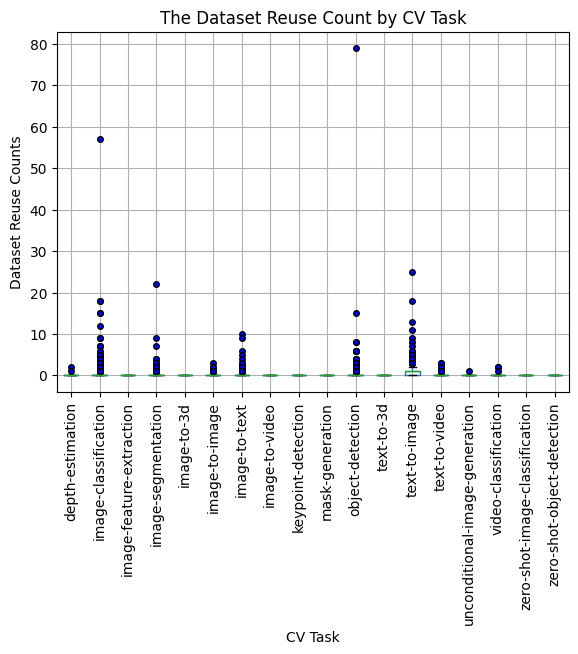

In [63]:
plt.figure(figsize=(12, 6))
flierprops = dict(marker='o', markersize=4, linestyle='none', color='blue', markerfacecolor='blue')  # Adjust marker size and fill color
df.boxplot(column='len', by='task', grid=True, flierprops=flierprops)
plt.xticks(rotation=90)
plt.title('The Dataset Reuse Count by CV Task')
plt.suptitle('')  # Remove the default title
plt.xlabel('CV Task')
plt.ylabel('Dataset Reuse Counts')
# plt.savefig('rq2-dataset-cv.png', bbox_inches='tight')
plt.show()

In [64]:
df['len']=df['used_models'].apply(lambda x: len(x))

In [65]:
df.sort_values(by='len', ascending=False, inplace=True)

In [66]:
df['len'].groupby(df['task']).mean().sort_values(ascending=False)

task
text-to-image                     0.635408
object-detection                  0.235113
image-classification              0.208461
text-to-video                     0.115385
image-segmentation                0.100141
image-to-text                     0.048643
depth-estimation                  0.038462
image-to-image                    0.022530
video-classification              0.016949
unconditional-image-generation    0.014493
zero-shot-image-classification    0.000000
mask-generation                   0.000000
text-to-3d                        0.000000
keypoint-detection                0.000000
image-to-video                    0.000000
image-to-3d                       0.000000
image-feature-extraction          0.000000
zero-shot-object-detection        0.000000
Name: len, dtype: float64

In [67]:
cv_dataset_df['dataset_count'].groupby(cv_dataset_df['task']).std()

task
depth-estimation                  2.301185
image-classification              0.297416
image-feature-extraction          1.957936
image-segmentation                0.219267
image-to-3d                       0.625543
image-to-image                    0.604580
image-to-text                     2.911287
image-to-video                    1.011628
keypoint-detection                0.000000
mask-generation                   0.707107
object-detection                  0.252203
text-to-3d                        0.666667
text-to-image                     0.537395
text-to-video                     1.591944
unconditional-image-generation    1.938097
video-classification              0.975900
zero-shot-image-classification    0.868437
zero-shot-object-detection             NaN
Name: dataset_count, dtype: float64